In [ ]:
# pip install scikit-bio

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('../Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('../Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns
gene_names = Y.columns

# List of columns for iterating
columns = list(Y)
print(len(feature_names))

# preprocessing
from skbio.stats.composition import clr
from sklearn.metrics import euclidean_distances

# Imputation
Y = Y.replace(to_replace=0, value=0.000001)

# Center log ratio
Y_clr = clr(Y)

# Transformation 
Y_euc = euclidean_distances(Y_clr)

22


In [4]:
# plot result
def plot_tsne(tsne_result, labels, n):
    tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': predictors_df[f'{labels}']})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
    lim = (tsne_result.min()-5, tsne_result.max()+5)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect('equal')
    ax.set_title(f'T-SNE Results by {labels}\nPerplexity: {n}     Max Iterations: 5000')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    ax.axis('off')
    # fig.text(.5, -.01, f"Perplexity: {n}     Max Iterations: 5000", ha='center')
    plt.savefig(f'Figures/{n}_{labels}.svg', format='svg')
    plt.show()

In [ ]:
# creating individual tsne models
for item in feature_names:
    for n in [5, 15, 25, 35, 45, 55]:
        tsne = TSNE(n_components=2, verbose=1, perplexity=n, max_iter=5000) # can iterate to change these params
        tsne_result = tsne.fit_transform(Y_clr)
        plot_tsne(tsne_result, item, n)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.001s...
[t-SNE] Computed neighbors for 204 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 14.445682
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.936939
[t-SNE] KL divergence after 4050 iterations: 0.528106


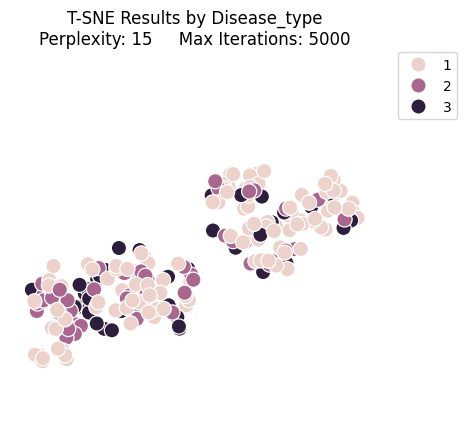

In [6]:
# Grabbing graph for poster presentation
item = 'Disease_type'
tsne = TSNE(n_components=2, verbose=1, perplexity=15, max_iter=5000) 
tsne_result = tsne.fit_transform(Y_clr)
plot_tsne(tsne_result, item, 15)

In [ ]:
# Creating big image (DOESNT WORK)
'''
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.image as mpimg
import os

fig = plt.figure(figsize=(3000, 3000))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(19, 5),  # creates 2x2 grid of Axes
                 axes_pad=0.2,  # pad between Axes in inch.
                 share_all=True,
                 direction="column"
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

img_list = []
img_names = sorted(os.listdir('Figures'))
for name in img_names:
    if not name.startswith('.'): # ignores hidden files
        image = mpimg.imread(f'Figures/{name}')
        img_list.append(image)
        
for ax, im in zip(grid, img_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.savefig(f'BigGraph.png')
plt.show()
#img_list = sorted(img_list, key=lambda x: x[0])
'''

In [4]:
# Graphs by Feature
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.image as mpimg
import os

for feature_name in feature_names:
    fig = plt.figure(figsize=(20, 10))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, 5),  # creates 2x2 grid of Axes
                     axes_pad=0.1,  # pad between Axes in inch.
                     share_all=True,
                     direction="row"
                     )
    grid[0].get_yaxis().set_ticks([])
    grid[0].get_xaxis().set_ticks([])
    
    img_list = []
    for n in [5, 15, 25, 35, 45, 55]:
        img = mpimg.imread(f'Figures/{n}_{feature_name}.png')
        img_list.append(img)
        
    for ax, im in zip(grid, img_list):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        
    plt.savefig(f'Results_by_Feature/{feature_name}.png')
    plt.close()